<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add here


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


- For the "Median value of owner-occupied homes" provide a boxplot

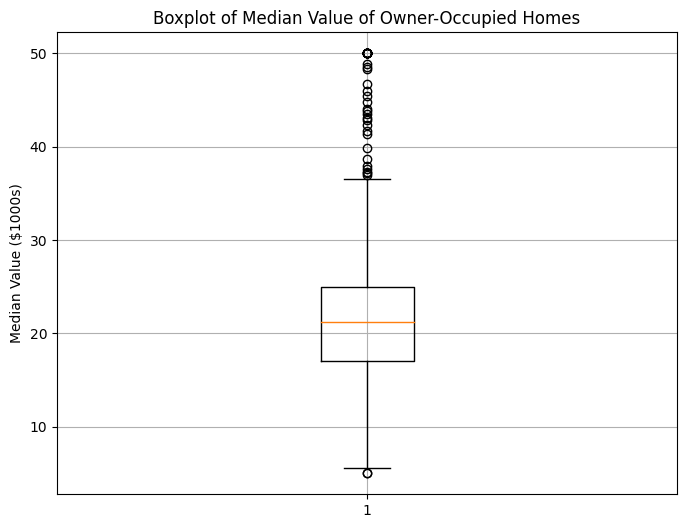

In [13]:
import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000s)")
plt.grid(True)
plt.show()


### Main Findings
- The boxplot of the MEDV column from the Boston Housing dataset shows the distribution of 
  median home prices (in $1,000s) across all housing tracts in the dataset.
- The housing market in the dataset is not uniformly distributed—most 
  home prices are clustered around the middle range, but a significant 
  number of high-value homes pull the distribution upward.

- The presence of outliers indicates areas with premium housing or 
  unique attributes (e.g., proximity to the river, more rooms, better location).

- A  bar plot for the Charles river variable

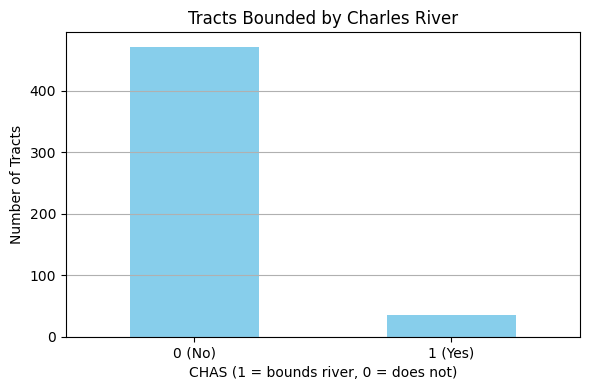

In [14]:
import matplotlib.pyplot as plt

# Check unique values and counts in the CHAS column
chas_counts = boston_df['CHAS'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(6, 4))
chas_counts.plot(kind='bar', color='skyblue')
plt.title("Tracts Bounded by Charles River")
plt.xlabel("CHAS (1 = bounds river, 0 = does not)")
plt.ylabel("Number of Tracts")
plt.xticks([0, 1], ['0 (No)', '1 (Yes)'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Main Findsings

- Since so few homes are near the Charles River, this feature is highly imbalanced.

- However, despite being rare, proximity to the river might positively influence property value 

### Provide a boxplot for the MEDV variable vs the AGE variable. 
  (Discretize the age variable into three groups of 35 years and younger, 
  between 35 and 70 years and 70 years and older)

<Figure size 800x600 with 0 Axes>

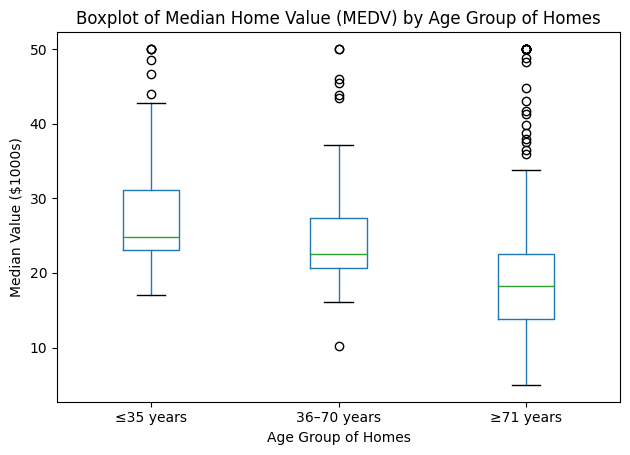

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'boston_df' already exists and has 'MEDV' and 'AGE' columns

# Step 1: Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]  # Define age ranges
labels = ['≤35 years', '36–70 years', '≥71 years']  # Group labels
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Step 2: Create a boxplot of MEDV grouped by AGE_GROUP
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='AGE_GROUP', grid=False)
plt.title('Boxplot of Median Home Value (MEDV) by Age Group of Homes')
plt.suptitle('')  # Remove default pandas title
plt.xlabel('Age Group of Homes')
plt.ylabel('Median Value ($1000s)')
plt.tight_layout()
plt.show()


### Main Findings
- The boxplot comparing Median Value of Owner-Occupied Homes (MEDV) across 
  three age groups of homes reveals important trends about how the age of buildings 
  relates to property values.
- Home age is a strong predictor of home value: newer homes tend to be more valuable,
  but older homes show more variability.
- There is likely interaction with other variables (e.g., location, size, proximity to city)
  that influences value beyond just age.

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

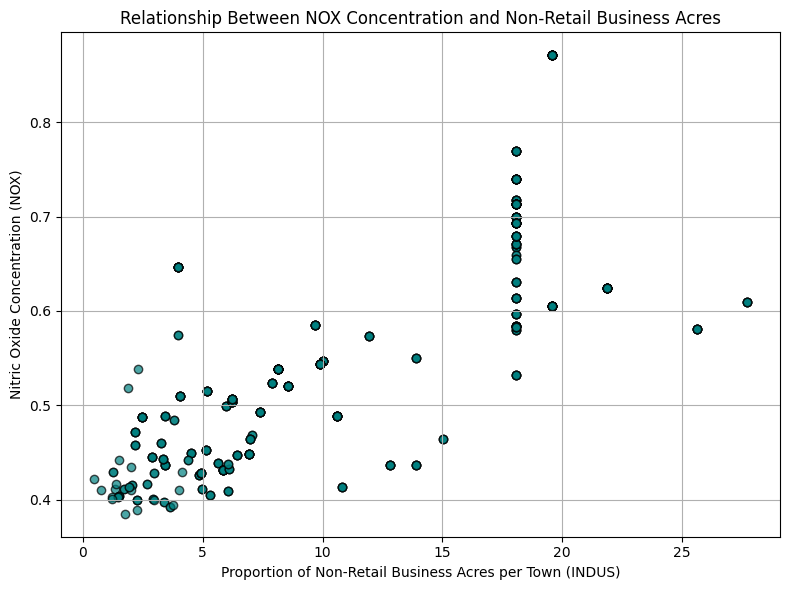

In [16]:
import matplotlib.pyplot as plt

# Scatter plot: NOX vs. INDUS
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.7, color='teal', edgecolor='k')
plt.title('Relationship Between NOX Concentration and Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Main Findings
1. Positive Correlation:

    - As the proportion of non-retail business acres (INDUS) increases, the nitric oxide concentration (NOX) also tends to increase.

    - This suggests a positive relationship — towns with more industrial land tend to have higher pollution levels.

2. Environmental Insight:

 - This trend reflects real-world urban planning effects: industrial zones are typically associated with higher emissions, including NOX.

3. Non-linear Clustering:

   - In some datasets, you might notice clusters of towns with low INDUS and low NOX, and a steeper rise in NOX as INDUS increases — hinting at non-linear patterns.

### Create a histogram for the pupil to teacher ratio variable

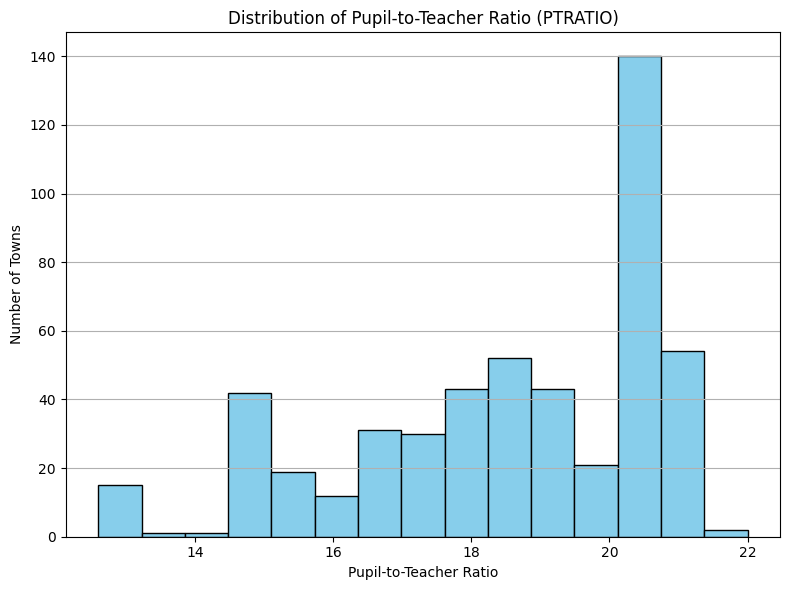

In [17]:
import matplotlib.pyplot as plt

# Create histogram for pupil-teacher ratio (PTRATIO)
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Pupil-to-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Number of Towns')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Main Findings
- Towns with lower PTRATIO (smaller class sizes) may indicate better-funded schools or higher educational quality, which could positively influence home values.

- The relatively narrow distribution implies that education access in terms of student–teacher ratio is not highly unequal across the sampled areas.

- This variable is often negatively correlated with MEDV — meaning towns with better teacher access (lower PTRATIO) tend to have higher home prices.